<Figure size 432x288 with 0 Axes>

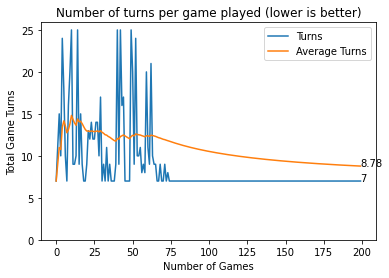

In [1]:
from os import stat
import os
from time import sleep
from game import Game
from agent import Agent
from helper import plot


def train():
    agent1 = Agent()
    agent2 = Agent()
    plot_scores = []
    plot_avg_scores = []
    game_over = False
    best_score = 0
    total_score = 0
    game = Game()

    def endGame(game):
        game.reset()
        agent1.n_games += 1
        # agent1.train_long_memory()
        agent2.n_games += 1
        # agent2.train_long_memory()
        print('Game', agent1.n_games, flush=True)

    def plotGame(score, total_score):
        print('total', score)
        plot_scores.append(score)
        mean_score = total_score / agent1.n_games
        plot_avg_scores.append(mean_score)
        plot(plot_scores, plot_avg_scores)

    while True:
        if agent1.n_games >= 200:
            return
        # -----------------------------------------
        # Agent One
        # -----------------------------------------
        # get current state
        state_old = agent1.get_state(game)

        # get move
        final_move = agent1.get_action(state_old)

        # perform move and get new state
        reward, game_over, score, _ = game.playPiece(final_move)
        state_new = agent1.get_state(game)

        # train short memory
        agent1.train_short_memory(state_old, final_move, reward, state_new, game_over)

        # remember
        agent1.remember(state_old, final_move, reward, state_new, game_over)

        if game_over:
            endGame(game)
            total_score += score
            plotGame(score, total_score)
            if score <= best_score:
                best_score = score
                agent1.model.save('a1model.pth')
            agent2.remember(state_old, [1, 0, 0, 0, 0], -10, state_new, game_over)
            game.reset()
            continue

        # -----------------------------------------
        # Agent Two
        # -----------------------------------------
        # get current state
        state_old = agent2.get_state(game)

        # get move
        final_move = agent2.get_action(state_old)

        # perform move and get new state
        reward, game_over, score, _ = game.playPiece(final_move)
        state_new = agent2.get_state(game)

        # train short memory
        agent2.train_short_memory(state_old, final_move, reward, state_new, game_over)

        # remember
        agent2.remember(state_old, final_move, reward, state_new, game_over)

        if game_over:
            endGame(game)
            total_score += score
            plotGame(score, total_score)
            if score <= best_score:
                best_score = score
                agent2.model.save('a2model.pth')
            agent1.remember(state_old, [1, 0, 0, 0, 0], -10, state_new, game_over)
            game.reset()

if __name__ == '__main__':
    train()